# ***Submitted by KHUSHBOO***

## **1. Dataset**
### **a. You are provided with the fashion MNIST dataset**



In [1]:
# Import required packages
import numpy as np
import pandas as pd
import keras
import tensorflow as tf

In [2]:
# Checking Available Deices
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12985451578612612207
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14328594432
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11543446033809862089
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


## **2. Split the data into x_train, y_train, x_test and y_test.**


In [3]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## **a. Display the sample images from x_train**


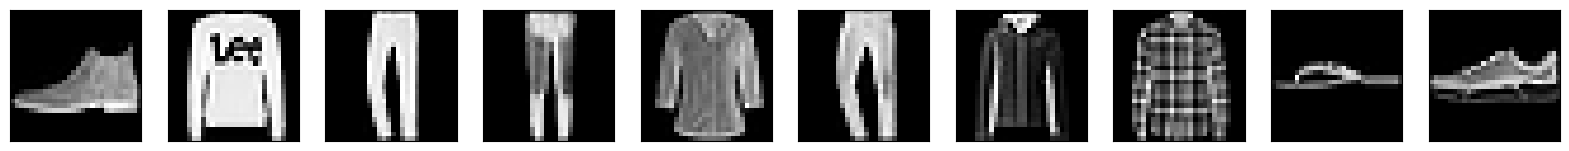

In [4]:
import matplotlib.pyplot as plt

# Number of digit to display
n = 10

# Create a figure to display the images
plt.figure(figsize = (20,4))

# Loop through the first 'n' images
for i in range(n):
  # create the subplot
  ax = plt.subplot(2,n,i+1)

  # display the images
  plt.imshow(x_test[i].reshape(28,28))

  # Set colormap to grayscale
  plt.gray()

  # Hide x_axis and y_axis
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

# show the figure with the images
plt.show()

# Close the figure
plt.close()

## **b. Display the shape of x_train and y_train**


In [5]:
print("x_train shape : ", x_train.shape)
print("y_train shape : ", y_train.shape)

x_train shape :  (60000, 28, 28)
y_train shape :  (60000,)


## **3. Flatten the images**
### a. Reshape the images from 28x28 to 28x28x1.

In [6]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

## **4. Scale the data**
### **a. Convert the data into float 32 type**
### **b. Scale the data by dividing x_train and y_train by 255**


In [7]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

## **c. Display the shape of x_train and y_train after scaling.**


In [8]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

## seeing updated shapes
print("x_train shape : ", x_train.shape)
print("y_train shape : ", y_train.shape)

x_train shape :  (60000, 28, 28, 1)
y_train shape :  (60000, 10)


## **5. Define the hyper parameters for the neural networks**
**a. No. of Epochs**

**b. Batch size**

**c. Input_size of image (Img_height, Img_width, No of channels)**

**d. No of convolutional layers**

**e. Output_size (output layers depending upon the number of classes)**

In [9]:
from keras.models import Sequential
from keras.layers.core import Dense ,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [10]:
# Input_size of image (Img_height, Img_width, No of channels)
img_rows, img_cols,channels = 28,28,1

# No of convolutional layers
filters = [6,32,80,120]
classes = 10

## **6. Define the structure of your neural network**

In [12]:
model=Sequential()
#a. No of Convolutional layers
# b. Activation function for each convolutional layer
model.add(Conv2D(filters[0],(3,3),padding='same',\
                 activation='relu',input_shape=(img_rows,img_cols, channels)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters[1],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters[2],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters[3],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# c. Flatten the 2D vectors into 1D vector for FCN
model.add(Flatten())

# d. Number of output layer neurons and activation function
model.add(Dense(64,activation='relu'))
model.add(Dense(classes, activation='softmax'))

# e. Compile the model and provide following arguments
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [13]:
# f. Display the summary of the model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         60        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        800       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 80)          10320     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 3, 3, 80)        

## **7. Train the Neural Network**


In [14]:
# a. Fit the Model
# b. Train the Model for 15 epochs and report the training accuracy
model.fit(x_train, y_train, validation_split=0.2, epochs=15, batch_size=64, verbose=1)

Epoch 1/15
750/750 [==============================] - 15s 6ms/step - loss: 2.0578 - accuracy: 0.3185 - val_loss: 1.1193 - val_accuracy: 0.5794
Epoch 2/15
750/750 [==============================] - 4s 5ms/step - loss: 0.9065 - accuracy: 0.6481 - val_loss: 0.8101 - val_accuracy: 0.6854
Epoch 3/15
750/750 [==============================] - 4s 5ms/step - loss: 0.7103 - accuracy: 0.7270 - val_loss: 0.6461 - val_accuracy: 0.7559
Epoch 4/15
750/750 [==============================] - 4s 5ms/step - loss: 0.6206 - accuracy: 0.7654 - val_loss: 0.5563 - val_accuracy: 0.7916
Epoch 5/15
750/750 [==============================] - 4s 5ms/step - loss: 0.5645 - accuracy: 0.7891 - val_loss: 0.5535 - val_accuracy: 0.7992
Epoch 6/15
750/750 [==============================] - 5s 7ms/step - loss: 0.5268 - accuracy: 0.8035 - val_loss: 0.5020 - val_accuracy: 0.8087
Epoch 7/15
750/750 [==============================] - 4s 5ms/step - loss: 0.4919 - accuracy: 0.8180 - val_loss: 0.4680 - val_accuracy: 0.8312
Epoch

## **8. Test the model**
### **a. Find the testing accuracy of the model**


In [15]:
from sklearn.metrics import accuracy_score
import numpy as np
y_pred_probs = model.predict(x_test, verbose=0)
y_pred = np.where(y_pred_probs > 0.5,1,0)

# Calculate and print the test accuracy using predicted and true labels
test_accuracy = accuracy_score(y_pred, y_test)
print("\nTest accuracy: {}".format(test_accuracy))


Test accuracy: 0.8307


## **b. Compare the training and testing accuracy**

In [16]:
mask = range(20,50)
X_valid = x_test[0:20]
actual_labels = y_test[0:20]

# Predict probabilities for the selected validation samples
y_pred_probs_valid = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)

1/1 [==============================] - 0s 145ms/step


## **c. Display the predicted labels along the input image.**

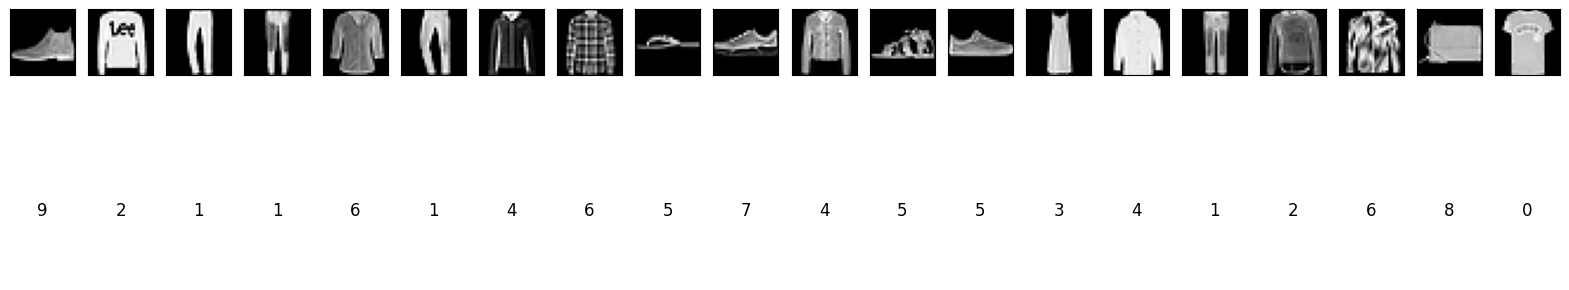

In [17]:
# Set up a figure to display images
n = len(X_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display the original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the predicted digit
    predicted_digit = np.argmax(y_pred_probs_valid[i])
    ax = plt.subplot(2, n, i + 1 + n)
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
    plt.axis('off')

# Show the plotted images
plt.show()

# Close the plot
plt.close()
